In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import torch

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"

In [2]:
data = torch.load(f"data/rocket_data.pt")

Y = data["Y"].detach().numpy()
n = len(Y)
t = np.linspace(1, n, n)

titles = [
    "Length utility", 
    r"Preference ordered: $\boldsymbol{\sigma} = (1, 2, 3)$",
    r"Distributional preference $\boldsymbol{\rho} = (0.5, 0.3, 0.2)$"
]
x_shift = [0.37, 0.15, 0.06]

In [3]:
def plot_data(best_Ys, other_Ys, contribution_values, contribution_label, colour, x_shift, titles):
    plt.rcParams["grid.color"] = (0.0, 0.0, 0.0, 0.1)
    plt.rcParams["axes.labelpad"] = 10
        
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.remove()

    plt.subplots_adjust(
        left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0.3
    )

    gs = fig.add_gridspec(5, 3)
    x_shift = [0.37, 0.15, 0.06]

    for i in range(len(best_Ys)):
        ax = fig.add_subplot(gs[0:5, i], projection="3d")
        best_Y = best_Ys[i]
        other_Y = other_Ys[i]

        ax.scatter(best_Y[:, 0], best_Y[:, 1], best_Y[:, 2], alpha=1, s=50, color=colour, edgecolors="black")
        ax.scatter(other_Y[:, 0], other_Y[:, 1], other_Y[:, 2], alpha=0.2, s=50, color="dodgerblue")

        ax.set_xlabel(r"$y^{(1)}$", fontsize=20)
        ax.set_ylabel(r"$y^{(2)}$", fontsize=20)
        ax.set_zlabel(r"$y^{(3)}$", fontsize=20)
        ax.tick_params(axis="both", which="major", labelsize=11)
        ax.view_init(25, 45)

        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False

        ax.xaxis.pane.set_edgecolor("w")
        ax.yaxis.pane.set_edgecolor("w")
        ax.zaxis.pane.set_edgecolor("w")

        ax.set_box_aspect(aspect=None, zoom=0.8)
        ax.text2D(x_shift[i], 0.83, titles[i], transform=ax.transAxes, fontsize=25)

        #################################################################################################
        ax = fig.add_subplot(gs[4, i])
        ax.bar(t, contribution_values[i], color=colour, edgecolor="k", linewidth=0.4)
        ax.set_xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])
        ax.tick_params(axis="both", which="major", labelsize=17.5)
        ax.set_xlim(0.25, n + 0.75)
        ax.set_xlabel(r"$n$", fontsize=20)
        ax.set_yticks([])
        ax.set_title(contribution_label, fontsize=25, pad=15)

    plt.show()
    return fig

# Maximal values

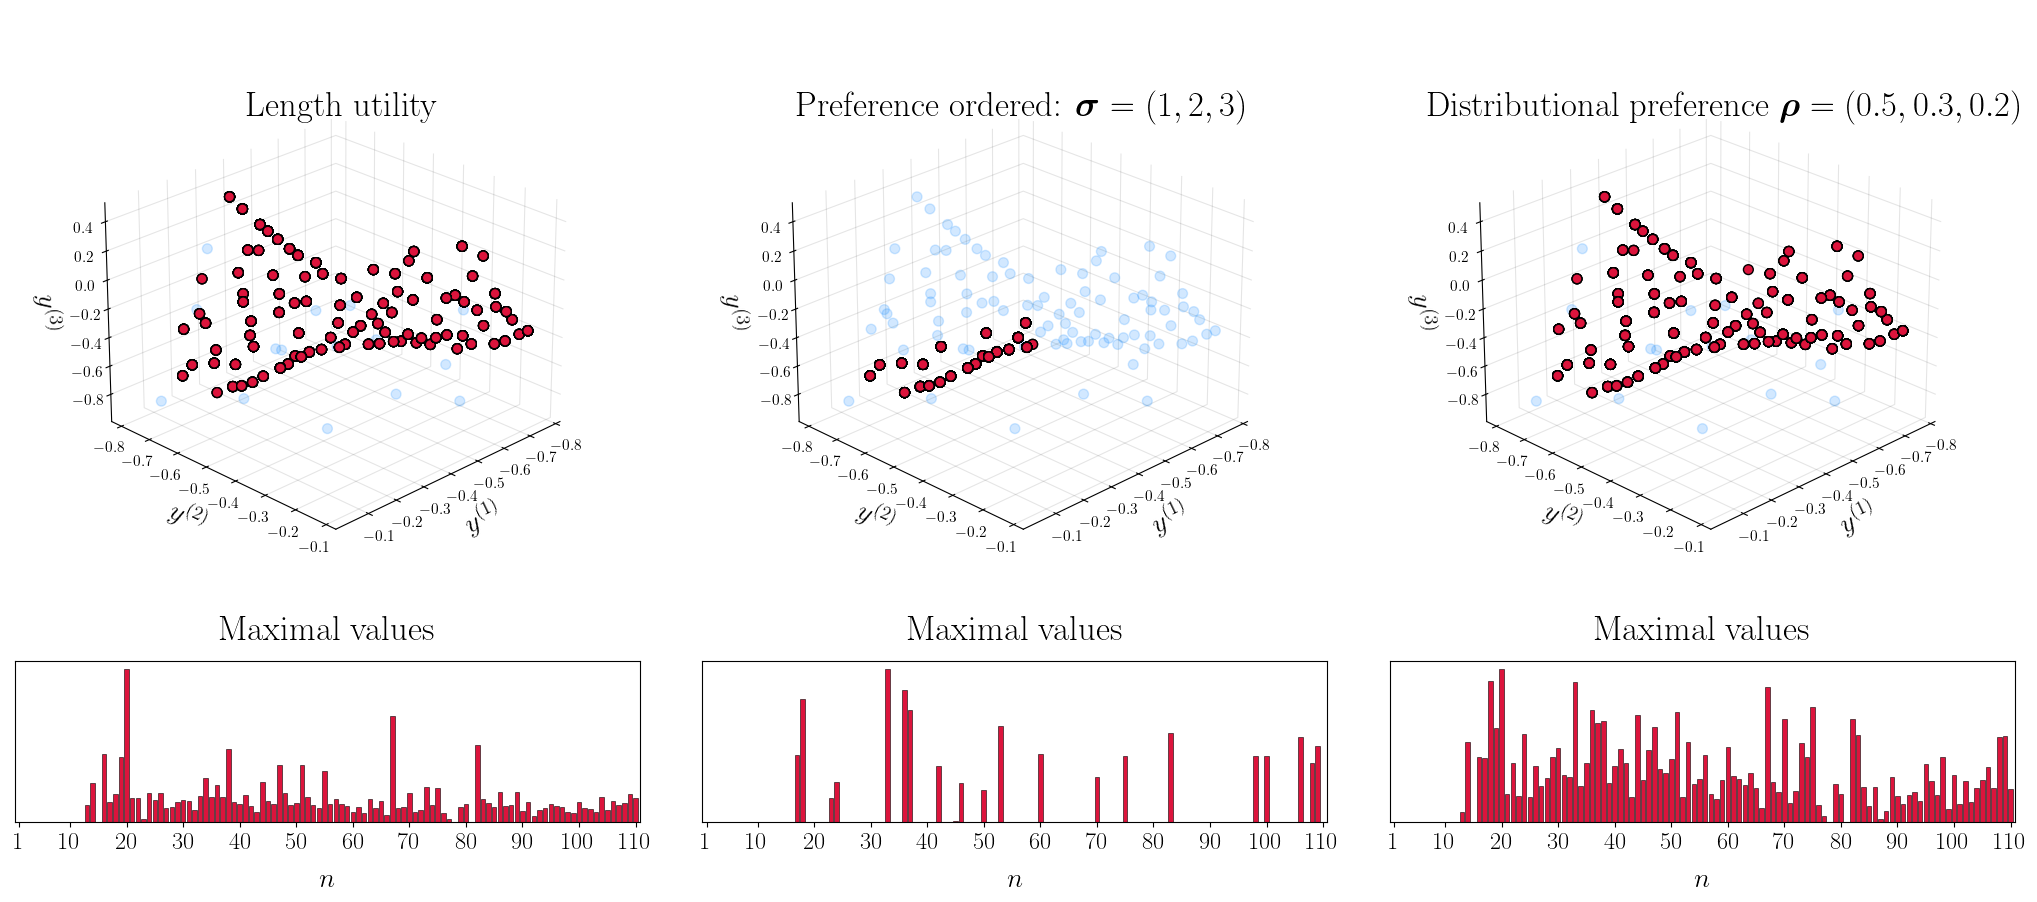

In [4]:
best_Ys = [value for key, value in data["best"]["maximal"].items()]
other_Ys = [value for key, value in data["other"]["maximal"].items()]
contribution_values = [value for key, value in data["maximal"].items()]
contribution_label = "Maximal values"
color = "crimson"

fig = plot_data(best_Ys, other_Ys, contribution_values, contribution_label, color, x_shift, titles)

# Forward greedy values

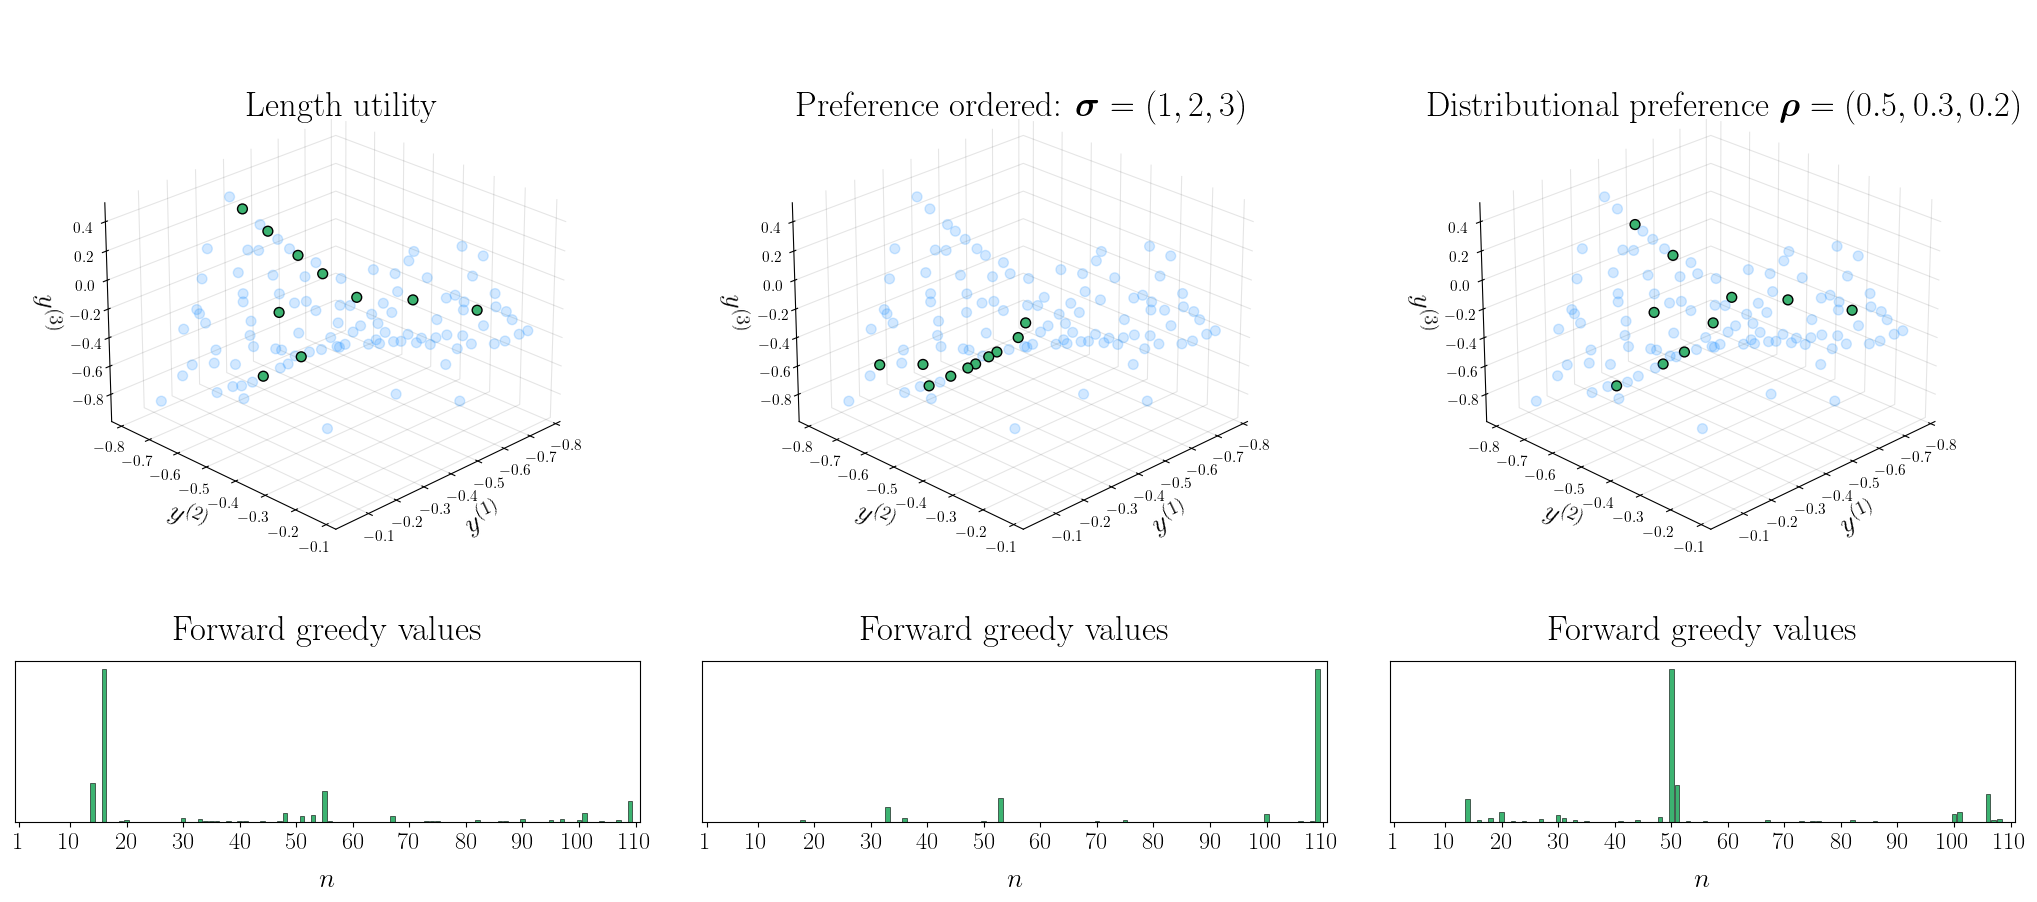

In [5]:
best_Ys = [value for key, value in data["best"]["forward"].items()]
other_Ys = [value for key, value in data["other"]["forward"].items()]
contribution_values = [value for key, value in data["forward"].items()]
contribution_label = "Forward greedy values"
color = "mediumseagreen"

fig = plot_data(best_Ys, other_Ys, contribution_values, contribution_label, color, x_shift, titles)

# Backward greedy values

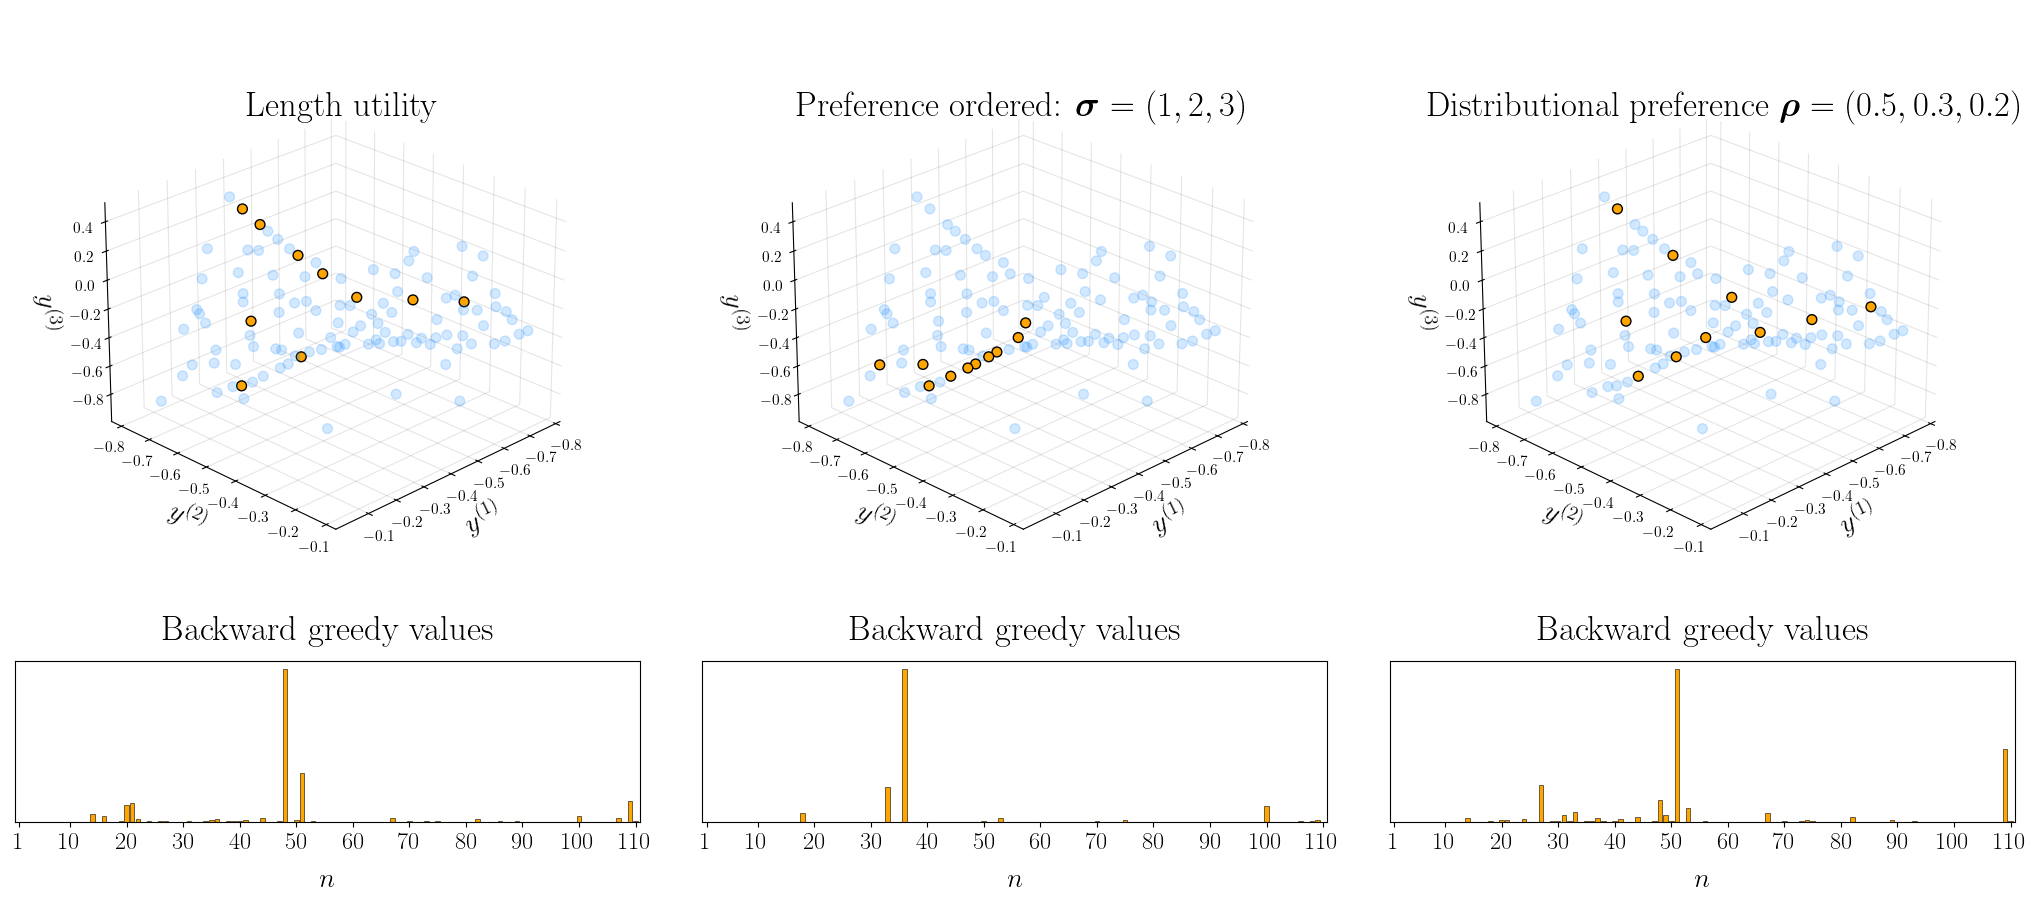

In [6]:
best_Ys = [value for key, value in data["best"]["backward"].items()]
other_Ys = [value for key, value in data["other"]["backward"].items()]
contribution_values = [value for key, value in data["backward"].items()]
contribution_label = "Backward greedy values"
color = "orange"

fig = plot_data(best_Ys, other_Ys, contribution_values, contribution_label, color, x_shift, titles)